# Time-dependent Behavior of Concrete Final-term project

## Tae-Kyung Kim 

### followed "CEB - FIP Model Code 2010"

In [900]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from itertools import accumulate
import sys

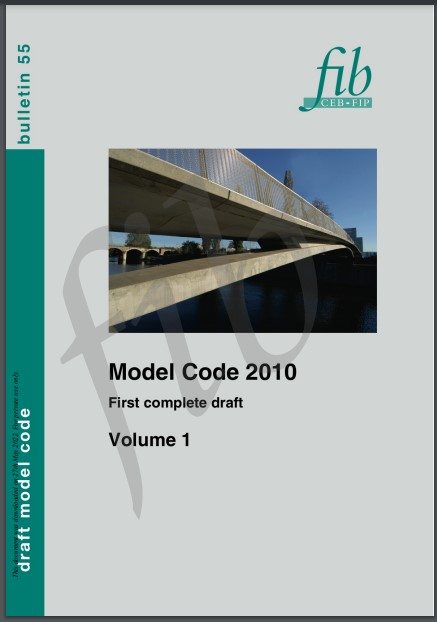

In [901]:
Image(filename='cover.jpg')

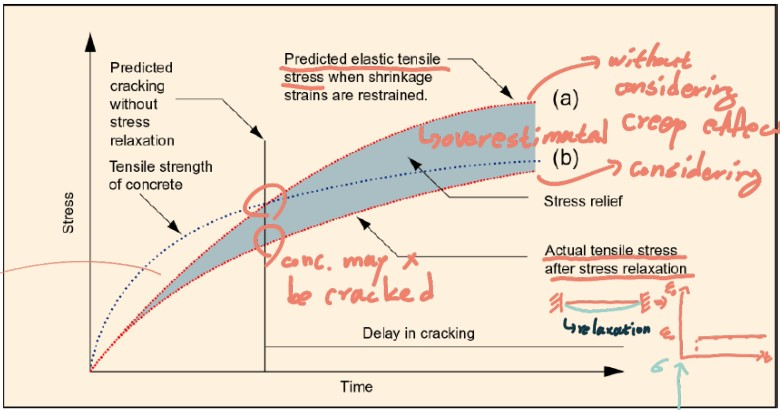

In [902]:
Image(filename='fig3.jpg')

### Data file import

In [903]:
filename_data   = 'Strain_Temperature.csv'

data            = np.genfromtxt(filename_data, delimiter=',')

number_data     = data.shape[0]

age             = data[:, 0]
total_strain    = data[:, 1]
temperature     = data[:, 2]

### given Material properties and Creep related parameters

In [904]:
fcm             = 28
alpha_T         = 3.44e-6

RH              = 50
h0              = 400

## 1. Maturity

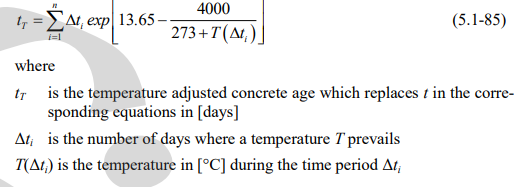

In [905]:
Image(filename='maturity.png')

In [906]:
# F --> C
T               = (temperature-32) * 1.8

# T_delta_t 
def T_delta_t(temperature):
    b = []
    for i in range(0,data.shape[0]):
        if (i == data.shape[0]-1):
            b.append(temperature[i])
        else:
            b.append((temperature[i] + temperature[i+1])/2)
    return b;

# delta_t 
delta_t         = np.diff(age, n= 1, axis = 0)
row             = np.array([0])
delta_t         = np.r_[delta_t.reshape(len(delta_t),1),[row]]

tT              = delta_t * np.exp(13.655 - (4000 / (273+np.array(T_delta_t(temperature)).reshape(len(T_delta_t(temperature)),1))))
t               = np.cumsum(tT)

# Effect of type of cement and curing temperature
t0              = np.array(t)[96] # setting time cell of t   
if t0 < 0.5:
    t0 = 0.5
    

## 2. Development with time

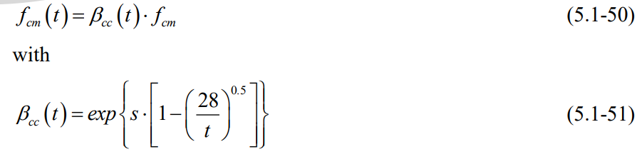

In [907]:
Image(filename='development strength with time.png')

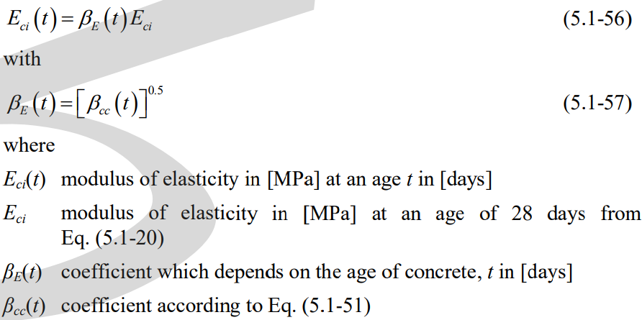

In [908]:
Image(filename='development E with time.png')

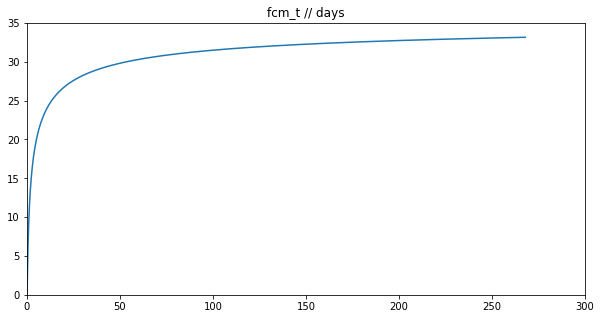

In [909]:
# strength 
s                 = 0.25 # strength class of cement --> 42.5N
beta_cc_t         = np.exp((1-np.sqrt(28/np.array(t))) * s)
fcm_t             = beta_cc_t * fcm
E_c0              = 21.5e3
alpha_E           = 1.0 # assumed quartzite aggregates
E_ci              = E_c0 * alpha_E * ((fcm_t)/10)**(1/3)  # E_ci = E_28


plt.figure(figsize=(10,5))
plt.title('fcm_t // days')
plt.plot(t, fcm_t)
plt.axis([0, 300, 0, 35])

# modulus of elasticity
def E_ci_t(t):
    beta_E_t      = (beta_cc_t)**0.5
    return beta_E_t * E_ci
E_ci_t            = E_ci_t(t)

## 3. Tensile stress

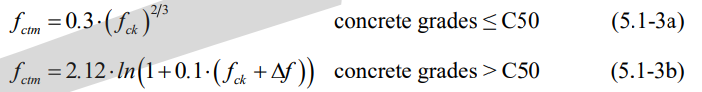

In [910]:
Image(filename='tensile strength.png')

In [911]:
# Tensile strength
fck               = 20 
fctm              = 2.12 * np.log(1 + 0.1 * (fcm_t))  # the mean value of tensile strength for normal weight concrete
fctkmin           = 0.7 * fctm
fctkmax           = 1.3 * fctm

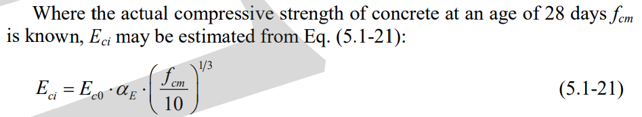

In [912]:
Image(filename='modulus of elasticity.png')

In [913]:
# Modulus of elasticity
alpha_i           = 0.8 + 0.2 * fcm_t/88  # <= 1.0
E_c               = alpha_i * E_ci  # a reduced modulus of elasticity(in order to account for initial plastic strain, causing some irreversible deformation)
strain_ct         = total_strain 
E_t               = E_ci  * np.exp((1 - np.sqrt(fcm_t / t)) * s/2) # converting E_ci to E_t

stress_ct         = E_t * strain_ct

## 4. Creep coefficient

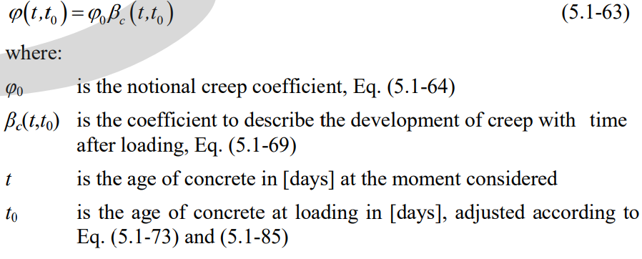

In [914]:
Image(filename='creep coefficient.png')

In [915]:
# Creep coefficient
phi_RH            = 1 + ((1 - (RH/100)) / (0.1*400**(1/3)))  # for fcm =< 35N/mm^2  
beta_fcm          = 16.8/np.sqrt(fcm_t)
beta_t0           = 1/(0.1 + fcm_t**0.2)
alpha_3           = np.sqrt(35/fcm_t)
beta_H            = 1.5 * (1 + (0.012 * RH)**18) * h0 + 250 * alpha_3  # for fcm =< 35N/mm^2 and <= 1500*alpha_3
beta_c_tt0        = ((t-t0)/ (beta_H + (t - t0)))**0.3  # development of creep with time
phi_0             = phi_RH * beta_fcm * beta_t0
E_t0              = E_ci  * np.exp((1 - np.sqrt(fcm_t / t0)) * s/2)             
beta_E            = E_t0 / E_t
phi_tt0           = phi_0 * beta_c_tt0 * beta_E

C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_19340\3594023488.py:7: RuntimeWarning: invalid value encountered in power
  beta_c_tt0        = ((t-t0)/ (beta_H + (t - t0)))**0.3  # development of creep with time


## 5. Stress dependent strain

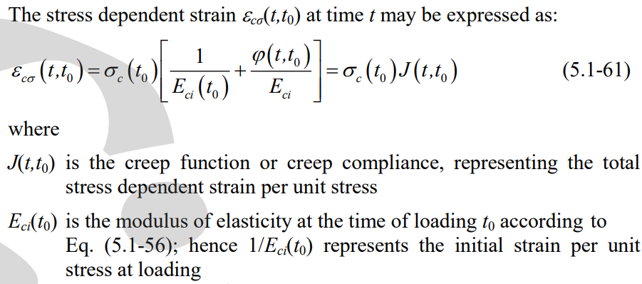

In [916]:
Image(filename='stress dependent strain.png')

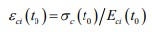

In [917]:
Image(filename='strain_ci.jpg') # p153

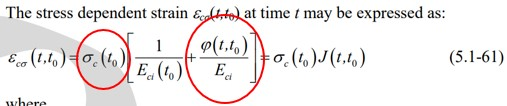

In [918]:
Image(filename='stress dependent strain only creep.jpg')

[1.29544372e-04 3.89191678e-02 4.87354459e-01 ... 3.47664289e+04
 3.47674024e+04 3.47674024e+04]


(0.0, 300.0, 0.0, 1.0)

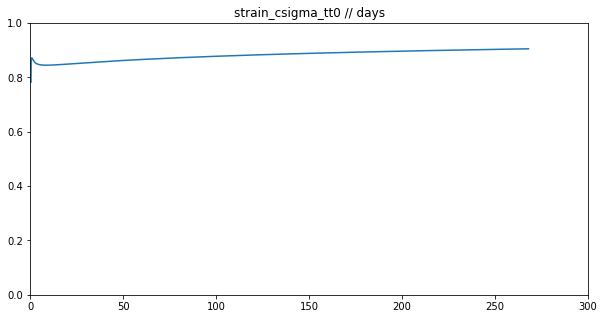

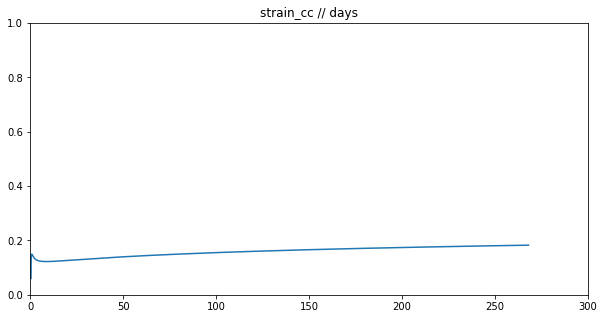

In [919]:
# Stress dependent strain = strain_ci + strain_cc
beta_cc_t0        = np.exp((1-np.sqrt(28/t0)) * s)
beta_E_t0         = np.sqrt(beta_cc_t0)
E_ci_t0           = beta_E_t0 * E_ci
strain_ci_t0      = data[95:96 , 1]
stress_c_t0       = E_ci_t0 * strain_ci_t0
J_tt0             = 1/E_ci_t0 + phi_tt0/E_ci
strain_csigma_tt0 = stress_c_t0 * J_tt0  # sigma_c_t0 * (1/E_ci_t0 + phi_tt0 / E_ci) = sigma * J
strain_cc         = strain_csigma_tt0 - data[95:96 , 1]

stress_csigma_tt0 = E_t * strain_csigma_tt0
stress_cc         = E_t * strain_cc


plt.figure(figsize=(10,5))
plt.title('strain_csigma_tt0 // days')
plt.plot(t, strain_csigma_tt0)
plt.axis([0, 300, 0, 1])

plt.figure(figsize=(10,5))
plt.title('strain_cc // days')
plt.plot(t, strain_cc)
plt.axis([0, 300, 0, 1])

## 6. Temperature effect

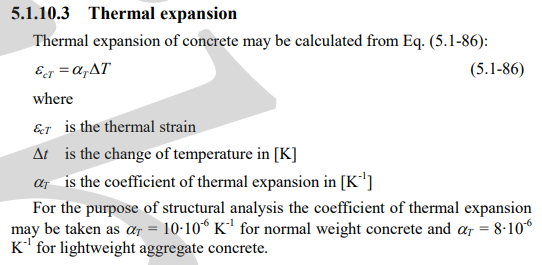

In [920]:
Image(filename='thermal expansion.png')

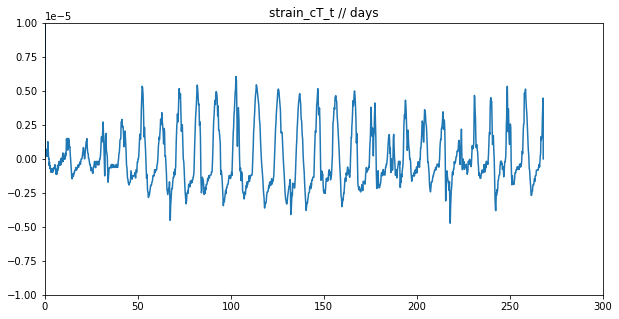

In [921]:
# Thermal expansion
lamda_T         = np.diff(temperature, n= 1, axis = 0)
beta_T          = np.exp(1500/(273+T) - 5.12)
beta_HT         = beta_H * beta_T
phi_T           = np.exp(0.015 * (T - 20))
phi_RH_T        = phi_T + (phi_RH - 1) * (phi_T**1.2)
phi_tt0_T       = phi_0 * beta_c_tt0 + 0.0004 * (T - 20)**2
strain_cT_t     = alpha_T * lamda_T
row             = np.array([0])
strain_cT_t     = np.r_[strain_cT_t.reshape(len(strain_cT_t),1),[row]]

plt.figure(figsize=(10,5))
plt.title('strain_cT_t // days')
plt.plot(t, strain_cT_t)
plt.axis([0, 300, -0.00001, 0.00001])

# Tensile strength
fctm_T          = fctm * (1.16 - 0.008 * T)

# Modulus of elasticity
E_ci_T          = E_ci * (1.06 - 0.003 * T)
E_ci_T          = E_ci_T.reshape(len(E_ci_T),1)

# stress with temperature
stress_cT_t     = strain_cT_t * E_ci_T.reshape(len(E_ci_T),1)

## 7. Total strain

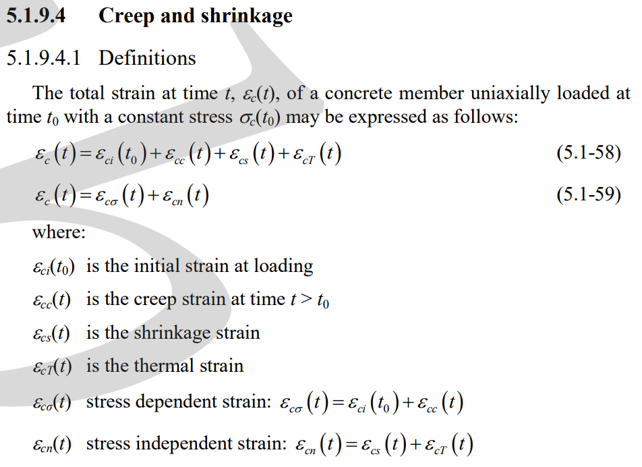

In [922]:
Image(filename='total strain.png')

(0.0, 280.0, 0.0, 1.0)

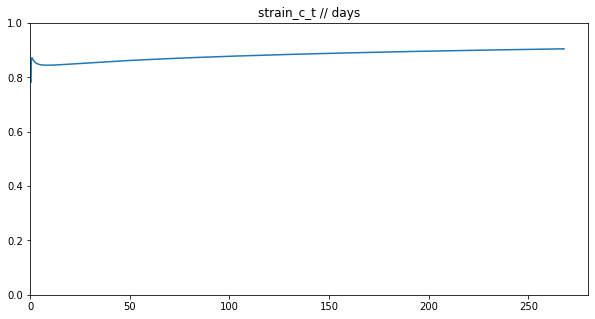

In [923]:
# calculated Total strain considering creep
strain_cs_t       = 0 # Don't consider drying shrinkage effect
strain_c_t        = strain_csigma_tt0.reshape(len(strain_csigma_tt0), 1) + strain_cT_t # no initial loading

plt.figure(figsize=(10,5))
plt.title('strain_c_t // days')
plt.plot(t, strain_c_t)
plt.axis([0, 280, 0, 1])

# Stress Summary

(0.0, 300.0, -2.0, 6500.0)

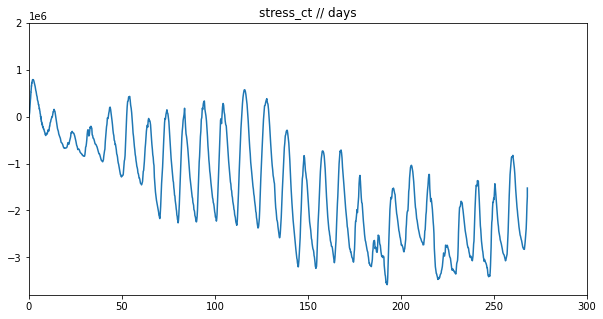

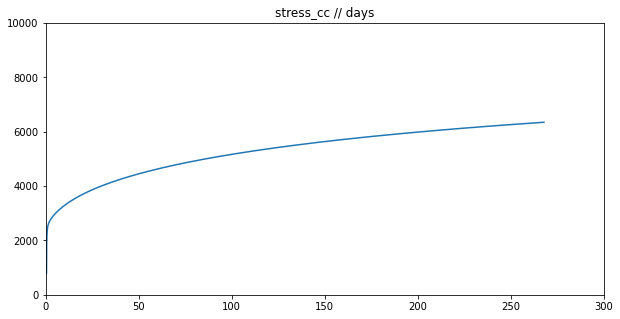

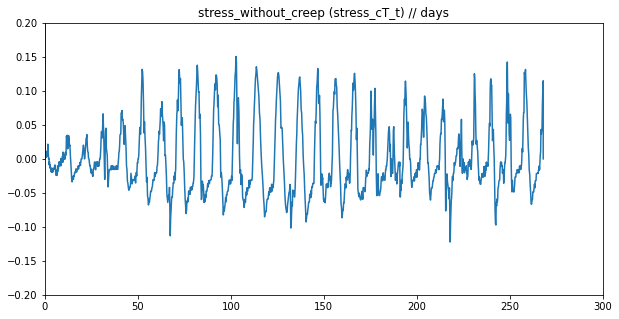

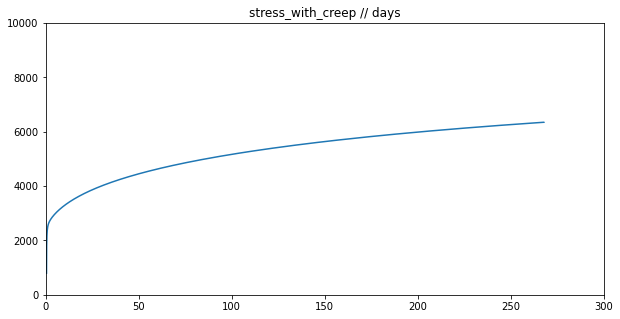

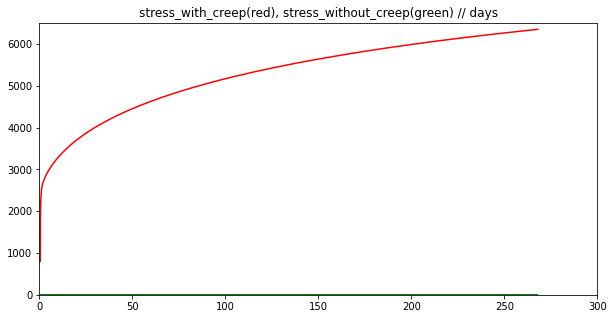

In [929]:
# stress_ct
plt.figure(figsize=(10,5))
plt.title('stress_ct // days')
plt.plot(t, stress_ct)
plt.axis([0, 300, -3800000, 2000000])

# stress_cc
plt.figure(figsize=(10,5))
plt.title('stress_cc // days')
plt.plot(t, stress_cc)
plt.axis([0, 300, 0, 10000])

# stress_cT_t
plt.figure(figsize=(10,5))
plt.title('stress_without_creep (stress_cT_t) // days')
plt.plot(t, stress_cT_t)
plt.axis([0, 300, -0.2, 0.2])

# without considering creep effect
stress_without_creep = stress_cT_t

# considering creep effect
stress_with_creep = stress_cc.reshape(len(stress_cc),1) + stress_cT_t

plt.figure(figsize=(10,5))
plt.title('stress_with_creep // days')
plt.plot(t, stress_with_creep)
plt.axis([0, 300, 0, 10000])


plt.figure(figsize=(10,5))
plt.title('stress_with_creep(red), stress_without_creep(green) // days')
plt.plot(t, stress_with_creep , 'r-' , t, stress_cT_t , 'g-')
plt.axis([0, 300, -2, 6500])